### Define Model dengan cara sequential

Menerima 8 input

Memiliki 1 hidden layer dengan 10 neuron

memiliki 1 output layer dengan 1 neuron


In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(10, input_shape=(8,)))
model.add(Dense(1))

Menerima 10 input

Memiliki 6 hidden layer
 
memiliki 1 output layer dengan 1 neuron


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

### Define Model dengan cara functional

Menerima 8 input

Memiliki 1 hidden layer dengan 10 neuron

memiliki 1 output layer dengan 1 neuron

In [3]:
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
# define the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)
# define the model
model = Model(inputs=x_in, outputs=x_out)

# Membangun model Neural Network dengan Tensorflow Keras

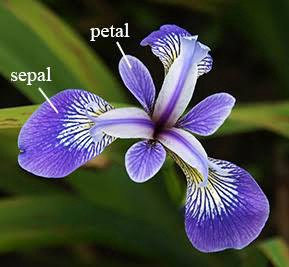

Run dari sini untuk latihan

In [4]:
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [5]:
# load dataset
path = 'https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv'
df = read_csv(path)

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# split data 
X, y = df.values[:, :-1], df.values[:, -1]
# ubah tipe data menjadi float32
X = X.astype('float32')

# encode string menjadi integer
y = LabelEncoder().fit_transform(y)

# split dataset menjadi 80% data training dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# memperoleh banyaknya jumlah fitur pada input
n_features = X_train.shape[1]


(120, 4) (30, 4) (120,) (30,)


## Latihan 1 
Membangun model

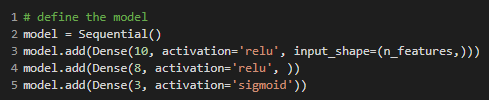




In [8]:
# TODO 1 : Ketik kode di atas pada cell ini
# define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu',))
model.add(Dense(3, activation='sigmoid'))

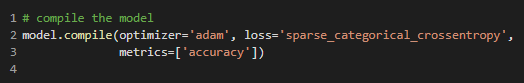

In [9]:
# TODO 2 : Ketik kode di atas pada cell ini

# compile the model
# model.compile(FIXME 1: masukkan nilai loss function, optimizer, dan metric)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

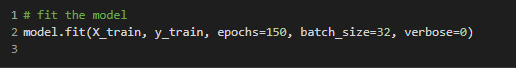

In [12]:
# TODO 3 : Ketik kode di atas pada cell ini

# fit the model
#model.fit(FIXME: masukkan data training, epoch dan batch size)
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

Epoch 1/150
4/4 - 0s - loss: 0.3849 - accuracy: 0.9083
Epoch 2/150
4/4 - 0s - loss: 0.3832 - accuracy: 0.9083
Epoch 3/150
4/4 - 0s - loss: 0.3816 - accuracy: 0.9083
Epoch 4/150
4/4 - 0s - loss: 0.3797 - accuracy: 0.9000
Epoch 5/150
4/4 - 0s - loss: 0.3783 - accuracy: 0.9000
Epoch 6/150
4/4 - 0s - loss: 0.3765 - accuracy: 0.9250
Epoch 7/150
4/4 - 0s - loss: 0.3746 - accuracy: 0.9333
Epoch 8/150
4/4 - 0s - loss: 0.3731 - accuracy: 0.9333
Epoch 9/150
4/4 - 0s - loss: 0.3713 - accuracy: 0.9500
Epoch 10/150
4/4 - 0s - loss: 0.3696 - accuracy: 0.9500
Epoch 11/150
4/4 - 0s - loss: 0.3679 - accuracy: 0.9333
Epoch 12/150
4/4 - 0s - loss: 0.3664 - accuracy: 0.9333
Epoch 13/150
4/4 - 0s - loss: 0.3645 - accuracy: 0.9333
Epoch 14/150
4/4 - 0s - loss: 0.3630 - accuracy: 0.9333
Epoch 15/150
4/4 - 0s - loss: 0.3615 - accuracy: 0.9333
Epoch 16/150
4/4 - 0s - loss: 0.3596 - accuracy: 0.9333
Epoch 17/150
4/4 - 0s - loss: 0.3581 - accuracy: 0.9333
Epoch 18/150
4/4 - 0s - loss: 0.3567 - accuracy: 0.9500
E

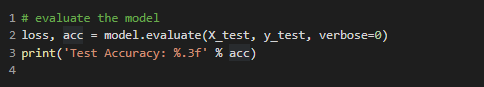

In [13]:
# TODO 4 : Ketik kode di atas pada cell ini

# evaluate the model
#loss = model.evaluate(FIXME: masukkan data testing)
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.000


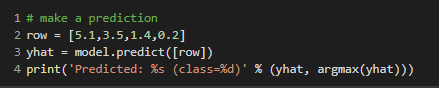

In [14]:
# TODO 5 : Ketik kode di atas pada cell ini
# make a prediction
# yhat = model.predict(FIXME : masukkan data yang ingin diprediksi)
row = [5.1, 3.5, 1.4, 0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d' % (yhat, argmax(yhat)))

Predicted: [[9.6535289e-01 3.9154539e-01 4.5105815e-04]] (class=0


# Visualize Deep Learning Model

### Model Text Description

In [15]:
# Contoh 
from tensorflow.keras.layers import Dense
# define model1
model1 = Sequential()
model1.add(Dense(100, input_shape=(10,)))
model1.add(Dense(80))
model1.add(Dense(30))
model1.add(Dense(10))
model1.add(Dense(5))
model1.add(Dense(1))

In [16]:
# Model text description model 1
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_14 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_15 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 6         
Total params: 11,981
Trainable params: 11,981
Non-trainable params: 0
__________________________________________________

### Model Architecture Plot

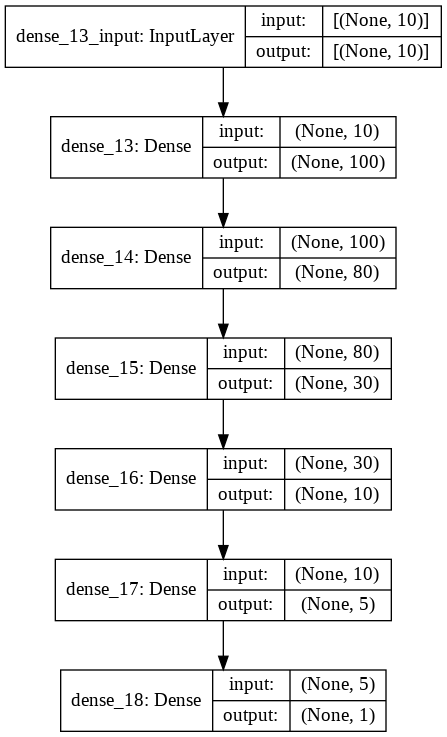

In [17]:
# Contoh model architecture plot
from tensorflow.keras.utils import plot_model
# summarize model 1
plot_model(model1, 'model_1_summary.png', show_shapes=True)

None = dimensi dinamis dari sebuah batch (mini batch)

Mahzab: https://stackoverflow.com/questions/47240348/what-is-the-meaning-of-the-none-in-model-summary-of-keras

### Plotting Learning curves

In [18]:
# Contoh plotting learning curves
# define model 2 
model2 = Sequential()
model2.add(Dense(10, activation='relu', input_shape=(n_features,)))
model2.add(Dense(8, activation='relu', ))
model2.add(Dense(3, activation='softmax'))

# compile model 2
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit model 2
history = model2.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0,validation_split=0.3)

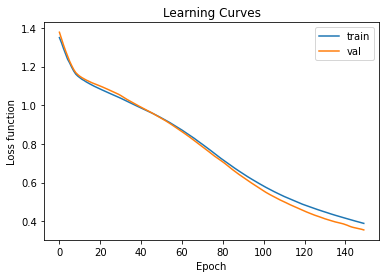

In [19]:
from matplotlib import pyplot
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss function')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

### Save and Load Model

In [20]:
# save model 2 ke dalam file dengan nama "model_2.h5"
model2.save('model_2.h5')

Load Model

In [21]:
from tensorflow.keras.models import load_model
# load model 2 untuk digunakan lagi dari file
model3 = load_model('model_2.h5')

loss, acc = model3.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy_model_3: %.3f' % acc)

# Buat prediksi
row = [0.1,0.5,7.4,7.2]
yhat = model3.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Test Accuracy_model_3: 0.933
Predicted: [[1.4377511e-04 5.7295704e-01 4.2689916e-01]] (class=1)


# Latihan 2

1. Tampilkan deskripsi text dari model pada latihan 1
2. Plot arsitektur dari model pada latihan 1
3. Save model pada latihan 1 dengan nama "nama_kelas.h5"

# Get Better Model Performance

### Menggunakan Dropout untuk mengurangi overfitting


In [22]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dropout(0.5))
model.add(Dense(80))
model.add(Dropout(0.5))
model.add(Dense(30))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Dense(1))

### Mempercepat Training dengan Batch Normalization

In [23]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(BatchNormalization())
model.add(Dense(30))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Dense(5))
model.add(Dense(1))

# Activity 

### Fashion-MNIST adalah kumpulan dataset terdiri dari 28x28 gambar grayscale dari 70.000 produk fashion dari 10 kategori, dengan 7.000 gambar per kategori.Training set memiliki 60.000 gambar dan testing set memiliki 10.000 gambar. 


<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

### Buat model neural network untuk menyelesaikan permasalahan klasifikasi pada dataset Fashion-MNIST

### Silahkan buka link berikut, kemudian save as copy 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1LAkpMgD0IRfgUQP9CcGpkgMDt-QXY_uK?usp=sharing)


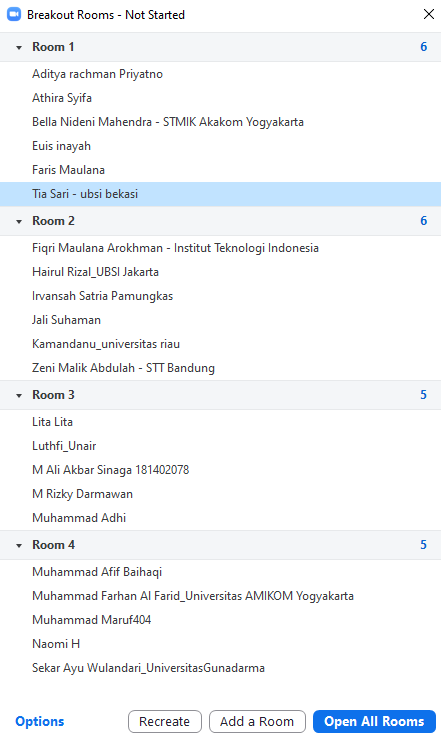